# WeatherPy
----

### Analysis
* The first graph (temperatures vs latitude) shows strong correlation between latitude of a city and current temperature. Firstly, the closer to equator, the hoter it is. And secondly, nothern hemosphere is colder then the southern one at this time of the year. I would expect this graph to flip around it vertical axel if we were to run a similar test in a summer. 
* THe second graph (Humidity vs Latitude) is pretty evenly distributed, with slight tendency towards datapoints concentrated towards the highter humidity levels. 
* There is no strong correlation between latitude and cloudiness. There seems to be a higher concentration of datapoints towards lower (0%) and higher (100%) marks.
* There is no strong correlation between latitude and wind speed. It would be interesting to observe if there is any relationship between wind directon and latitutude, 


In [312]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os
import random
import datetime

#import API key
#import api_keys
#api_keys = 'd20d64cda6b5434c520d880272ea2373'  #first request
api_keys='0f2e796102538c4688690480a748cc19'     #second request
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [313]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [314]:
#API call example
#url  = 'http://history.openweathermap.org/data/2.5/history/city?lat=41.85&lon=-87.65' 
#query_url = f"{url}appid={api_key}&units={units}&q="
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_keys}&units={units}&q="
query_url


'http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q='

In [315]:
# set up lists to hold reponse info
lat = []
temp = []
humidity =[]
clowdiness = []
wind_speed=[]
cloudiness=[]
city_name=[]

In [316]:
# Loop through the list of cities and perform a request for data on each
#cities = ["paris", "london", "oslo", "beijing"]
date = -1
i=0
for city in cities:
    response = requests.get(query_url + city).json()
      
    try:
        a= response['coord']['lat']
        b=response['main']['temp_max']        
        c=response['main']['humidity']
        d=response['wind']['speed']
        e =response['clouds']['all']
        f=response['name']
        i=i+1
        lat.append(a)
        temp.append(b)
        humidity.append(c)
        wind_speed.append(d)
        cloudiness.append(e)
        city_name.append(f)
        if date<0:
            date = response['dt']
        print("Processed record " +  str(i) + ' | ' + city)
        print(query_url + city)

    except:
        print("No data found for " + city)

#print(date)


Processed record 1 | tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=tasiilaq
Processed record 2 | nikolskoye
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=nikolskoye
Processed record 3 | college
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=college
Processed record 4 | torbay
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=torbay
Processed record 5 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=rikitea
Processed record 6 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=busselton
Processed record 7 | san patricio
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=san patricio
Processed reco

Processed record 59 | yamada
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=yamada
Processed record 60 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=chokurdakh
Processed record 61 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=saskylakh
Processed record 62 | zhuzhou
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=zhuzhou
Processed record 63 | grand gaube
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=grand gaube
Processed record 64 | yima
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=yima
Processed record 65 | beeville
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=beeville
Processed recor

Processed record 116 | coihaique
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=coihaique
Processed record 117 | tura
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=tura
Processed record 118 | pacific grove
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=pacific grove
Processed record 119 | kyzyl-suu
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=kyzyl-suu
No data found for taolanaro
Processed record 120 | umkomaas
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=umkomaas
Processed record 121 | santander jimenez
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=santander jimenez
Processed record 122 | lebu
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4

Processed record 173 | juan lacaze
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=juan lacaze
Processed record 174 | itarema
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=itarema
Processed record 175 | menongue
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=menongue
Processed record 176 | vuktyl
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=vuktyl
Processed record 177 | san jose
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=san jose
Processed record 178 | panguipulli
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=panguipulli
Processed record 179 | saint george
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=saint

Processed record 231 | vaitape
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=vaitape
Processed record 232 | muros
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=muros
Processed record 233 | luderitz
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=luderitz
Processed record 234 | baglung
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=baglung
Processed record 235 | poronaysk
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=poronaysk
No data found for karaman
Processed record 236 | fonte boa
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=fonte boa
Processed record 237 | oum hadjer
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=me

Processed record 287 | raudeberg
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=raudeberg
Processed record 288 | damghan
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=damghan
Processed record 289 | pangnirtung
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=pangnirtung
Processed record 290 | georgetown
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=georgetown
Processed record 291 | ancud
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=ancud
Processed record 292 | okato
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=okato
Processed record 293 | biograd na moru
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=biograd na

Processed record 345 | tanabe
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=tanabe
Processed record 346 | aklavik
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=aklavik
Processed record 347 | ulladulla
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=ulladulla
No data found for kapoeta
Processed record 348 | khabary
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=khabary
Processed record 349 | victoria
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=victoria
Processed record 350 | gaoua
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=gaoua
Processed record 351 | lagoa
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=lago

Processed record 401 | loma bonita
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=loma bonita
No data found for bolshegrivskoye
Processed record 402 | moyale
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=moyale
Processed record 403 | miyako
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=miyako
Processed record 404 | hays
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=hays
Processed record 405 | khash
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=khash
No data found for yalchiki
Processed record 406 | kamaishi
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=kamaishi
Processed record 407 | qinhuangdao
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4

Processed record 458 | moree
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=moree
Processed record 459 | vanimo
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=vanimo
Processed record 460 | belem de sao francisco
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=belem de sao francisco
Processed record 461 | mattoon
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=mattoon
Processed record 462 | russell
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=russell
Processed record 463 | romny
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=romny
Processed record 464 | paracatu
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=paracat

Processed record 515 | naze
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=naze
Processed record 516 | komsomolskiy
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=komsomolskiy
Processed record 517 | kolpashevo
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=kolpashevo
Processed record 518 | havoysund
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=havoysund
Processed record 519 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=sao joao da barra
No data found for palabuhanratu
Processed record 520 | valley city
http://api.openweathermap.org/data/2.5/weather?appid=0f2e796102538c4688690480a748cc19&units=metric&q=valley city
Processed record 521 | manado
http://api.openweathermap.org/data/2.5/weather?appid=0f2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [317]:
weather_dict = {
    "lat": lat,
    "temp": temp,
    "humidity": humidity,
    "wind_speed": wind_speed,
    "cloudiness" : cloudiness,
    "city_name": city_name
}
weather_data = pd.DataFrame(weather_dict)

try:
    weather_data.to_csv(output_data_file, encoding='utf-8', index=True)
except RuntimeError:
    print("Please ensure that the output file directory exists.")
weather_data.head()

,lat,temp,humidity,wind_speed,cloudiness,city_name
0,65.61,-1.0,50,2.60,0,Tasiilaq
1,59.70,-9.0,85,3.00,75,Nikolskoye
2,64.86,-17.8,84,1.31,90,College
3,47.66,2.0,100,5.70,90,Torbay
4,-23.12,23.3,100,9.96,92,Rikitea


In [318]:
#convert date
local_date = time.strftime("%D", time.localtime(int(date)))


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [319]:
x_limit = 200
#x_axis = np.arange(-100, 100, 50)

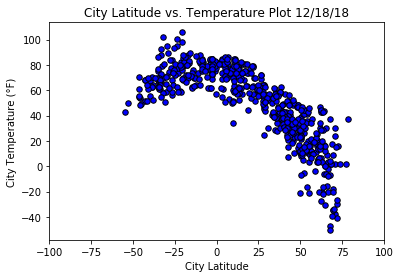

In [324]:
#temps_converted=T(°F) = T(°C) × 9/5 + 32 to Fahrenheit (°F)
plt.scatter(weather_data['lat'], (weather_data['temp'] * 9/5 + 32) , marker="o", facecolors="blue", edgecolors="black", s=30, alpha=1)
#plt.ylim(0, 1)
plt.xlim(-100, 100)
title = "City Latitude vs. Temperature Plot " + local_date
plt.title(Title)
plt.xlabel("City Latitude")
plt.ylabel("City Temperature (°F)")
plt.show()

#### Latitude vs. Humidity Plot

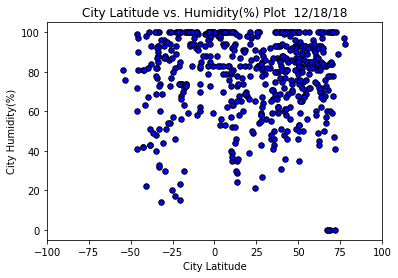

In [325]:
plt.scatter(weather_data['lat'], weather_data['humidity']  , marker="o", facecolors="blue", edgecolors="black", s=30, alpha=1)
#plt.ylim(0, 1)
plt.xlim(-100, 100)
title = "City Latitude vs. Humidity(%) Plot  " + local_date
plt.title(title)
plt.xlabel("City Latitude")
plt.ylabel("City Humidity(%)")
plt.show()

#### Latitude vs. Cloudiness Plot

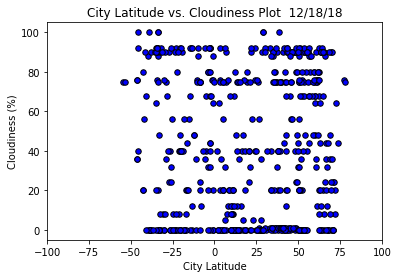

In [326]:
plt.scatter(weather_data['lat'], weather_data['cloudiness']  , marker="o", facecolors="blue", edgecolors="black", s=30, alpha=1)
plt.xlim(-100, 100)
title = "City Latitude vs. Cloudiness Plot  " + local_date
plt.title(title)
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

#### Latitude vs. Wind Speed Plot

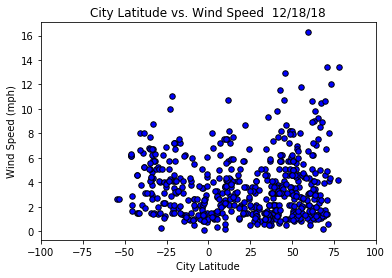

In [327]:
plt.scatter(weather_data['lat'], weather_data['wind_speed']  , marker="o", facecolors="blue", edgecolors="black", s=30, alpha=1)
plt.xlim(-100, 100)
title = "City Latitude vs. Wind Speed  " + local_date
plt.title(title)
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()